# Python Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)  # Show all rows



from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler; scaler = MinMaxScaler()


#from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier
)
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier



# Function Helpers

In [5]:
models = {
    #"Logistic Regression": LogisticRegression(max_iter=1000),
    #"Ridge Classifier": RidgeClassifier(),
    #"SGD Classifier": SGDClassifier(),
    #"SVM (RBF)": SVC(), # Slow
    #"Linear SVM": LinearSVC(),
    #"KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    #"Random Forest": RandomForestClassifier(),
    #"Extra Trees": ExtraTreesClassifier(),
    #"Gradient Boosting": GradientBoostingClassifier(),
    #"HistGradient Boosting": HistGradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    #"Bagging": BaggingClassifier(),
    #"Gaussian NB": GaussianNB(),
    #"Bernoulli NB": BernoulliNB(),
    #"MLP Classifier": MLPClassifier(max_iter=500),
}

models.update({
    #"XGBoost": XGBClassifier(eval_metric="logloss"),
    #"LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
})

# Import Data

In [6]:
#file_path = "C:/Users/PC/Desktop/Bank_System/Dataset2.csv"
file_path = "/content/Dataset2.csv"

df = pd.read_csv(file_path, sep=",")
df.shape

(307511, 122)

In [7]:
import pandas as pd

# 1️⃣ Separate classes
df_1 = df[df["TARGET"] == 1]
df_0 = df[df["TARGET"] == 0]

# 2️⃣ Desired size for class 0 (double class 1)
n_class1 = len(df_1)
n_class0_desired = 4 * n_class1

# 3️⃣ Randomly sample class 0
df_0_downsampled = df_0.sample(
    n=n_class0_desired,
    random_state=42
)

# 4️⃣ Combine back
df_balanced = pd.concat([df_1, df_0_downsampled])

# 5️⃣ Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# 6️⃣ Check result
print(df_balanced["TARGET"].value_counts())

df = df_balanced.copy()


TARGET
0    99300
1    24825
Name: count, dtype: int64


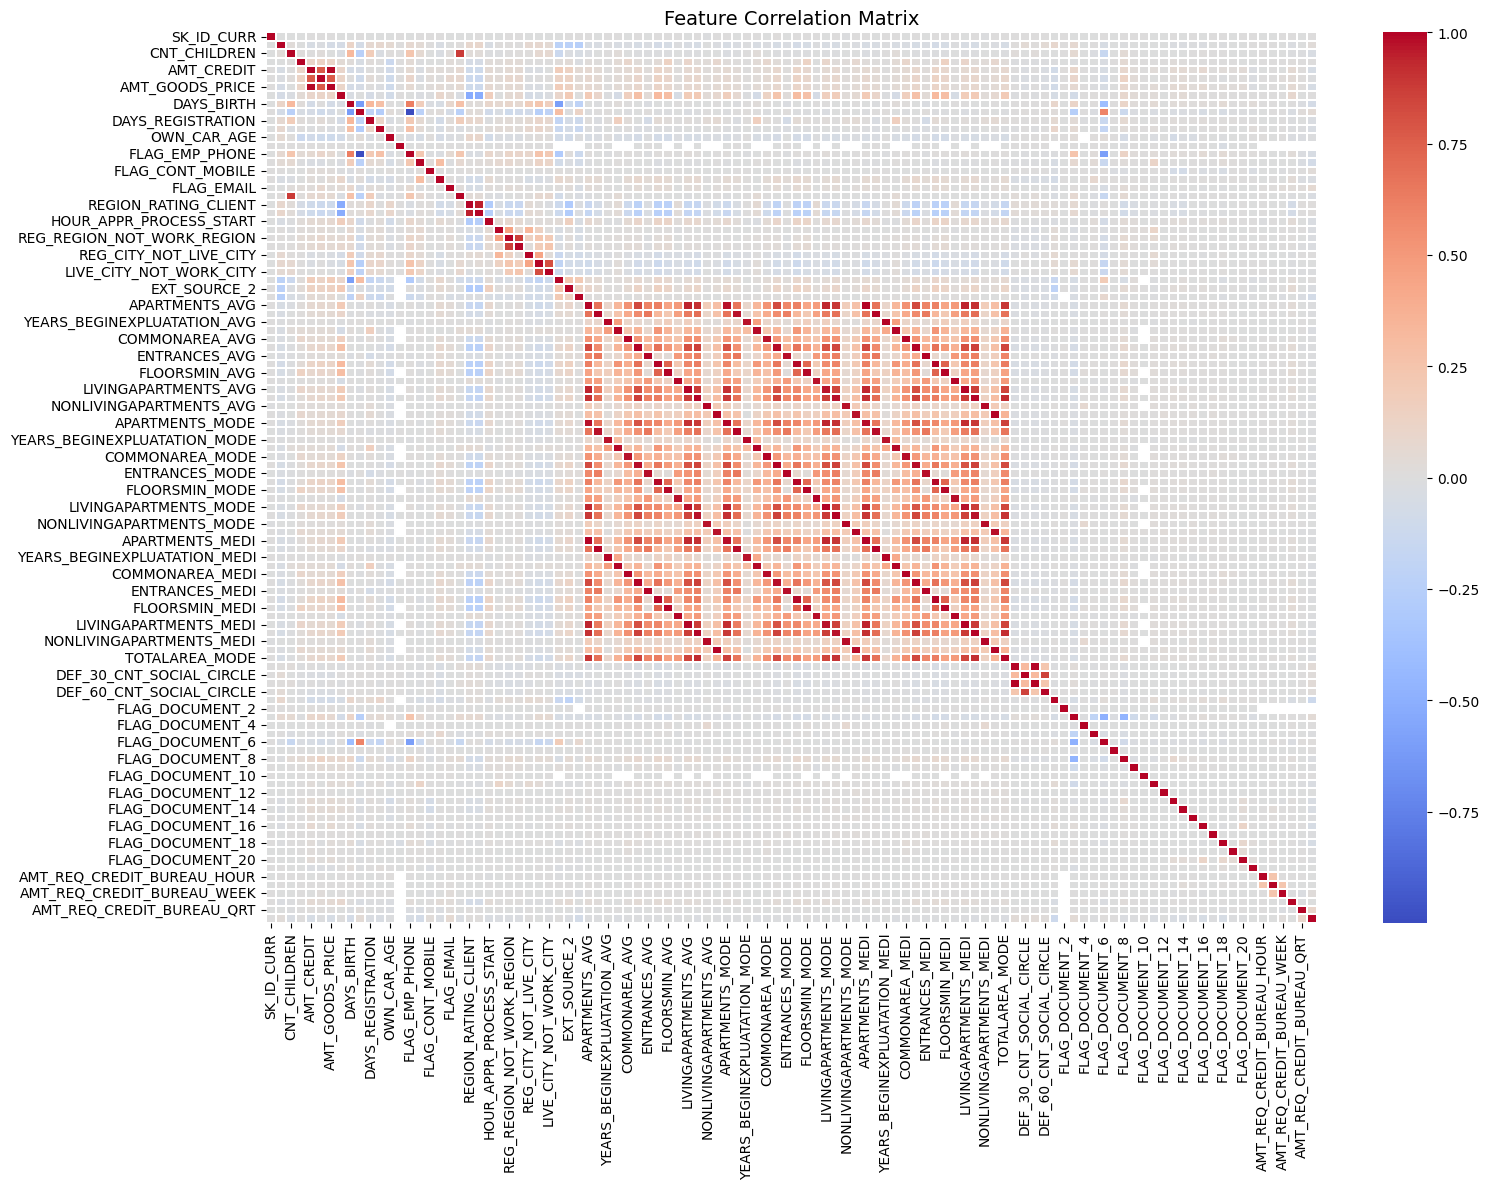

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------
# Keep numeric columns only
# ---------------------------------------------------
numeric_df = df.select_dtypes(include=["int64", "float64"])

# ---------------------------------------------------
# Correlation matrix
# ---------------------------------------------------
corr_matrix = numeric_df.corr()

# ---------------------------------------------------
# Plot correlation heatmap
# ---------------------------------------------------
plt.figure(figsize=(16, 12))

sns.heatmap(
    corr_matrix,
    cmap="coolwarm",        # red = positive, blue = negative
    center=0,               # center color at 0
    linewidths=0.3,
    cbar=True
)

plt.title("Feature Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()


# Cleaning, Per Processing & Transformation

## Missing Value Info.

In [9]:
missing_before = pd.DataFrame({
    "Missing_Count": df.isna().sum(),
    "Missing_%": (df.isna().mean() * 100).round(2)
}).sort_values("Missing_%", ascending=False)

missing_before

,Missing_Count,Missing_%
COMMONAREA_AVG,87412,70.42
COMMONAREA_MODE,87412,70.42
COMMONAREA_MEDI,87412,70.42
NONLIVINGAPARTMENTS_MEDI,86871,69.99
NONLIVINGAPARTMENTS_MODE,86871,69.99
NONLIVINGAPARTMENTS_AVG,86871,69.99
FONDKAPREMONT_MODE,85654,69.01
LIVINGAPARTMENTS_AVG,85640,68.99
LIVINGAPARTMENTS_MEDI,85640,68.99
LIVINGAPARTMENTS_MODE,85640,68.99


## Drop Features

In [10]:
drop_cols = [
    "DAYS_REGISTRATION", "DAYS_ID_PUBLISH",
    "APARTMENTS_AVG", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG",
    "YEARS_BUILD_AVG", "COMMONAREA_AVG", "ELEVATORS_AVG", "ENTRANCES_AVG",
    "FLOORSMAX_AVG", "FLOORSMIN_AVG", "LANDAREA_AVG", "LIVINGAPARTMENTS_AVG",
    "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG",
    "APARTMENTS_MODE", "BASEMENTAREA_MODE", "YEARS_BEGINEXPLUATATION_MODE",
    "YEARS_BUILD_MODE", "COMMONAREA_MODE", "ELEVATORS_MODE", "ENTRANCES_MODE",
    "FLOORSMAX_MODE", "FLOORSMIN_MODE", "LANDAREA_MODE",
    "LIVINGAPARTMENTS_MODE", "LIVINGAREA_MODE",
    "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE",
    "APARTMENTS_MEDI", "BASEMENTAREA_MEDI", "YEARS_BEGINEXPLUATATION_MEDI",
    "YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI", "ENTRANCES_MEDI",
    "FLOORSMAX_MEDI", "FLOORSMIN_MEDI", "LANDAREA_MEDI",
    "LIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI",
    "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI",
    "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "TOTALAREA_MODE",
    "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE"
]

df.drop(columns=drop_cols, inplace=True, errors="ignore")

## Replace Value XNA

In [11]:
df.replace("XNA", np.nan, inplace=True)

## Data Type Checker

In [12]:
for col in df.columns:
    if df[col].dtype == "object":
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass

## ABS Values

In [13]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols] = df[num_cols].abs()

## DAYS_EMPLOYED_NEW

In [14]:
def employed_flag(row):
    if row["NAME_INCOME_TYPE"] == "Unemployed":
        return "N"
    if row["DAYS_EMPLOYED"] > 180:
        return "N"
    return "Y"

df["DAYS_EMPLOYED_NEW"] = df.apply(employed_flag, axis=1)

# Pensioner override
df.loc[df["NAME_INCOME_TYPE"] == "Pensioner", "DAYS_EMPLOYED_NEW"] = "Y"
df.drop(columns=["DAYS_EMPLOYED"], inplace=True)

## EXT_SOURCE_

In [15]:
ext_cols = ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]

for col in ext_cols:
    new_col = col + "_NEW"
    df[new_col] = np.where(
        df[col].isna(), "dont have record",
        np.where(df[col] < 0.5, "Below 0.5", "Over 0.5")
    )
df.drop(columns=ext_cols, inplace=True)

## Replace Missing Value for some features

In [16]:
df["OCCUPATION_TYPE"].fillna("Not Provide", inplace=True)
df["NAME_TYPE_SUITE"].fillna("Others", inplace=True)
df = df[df["CODE_GENDER"].notna()]
df = df[df["CNT_FAM_MEMBERS"].notna()]
df = df.fillna(0)

/tmp/ipython-input-2039511526.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["OCCUPATION_TYPE"].fillna("Not Provide", inplace=True)
/tmp/ipython-input-2039511526.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

## Missing Value Info.

In [17]:
missing_before = pd.DataFrame({
    "Missing_Count": df.isna().sum(),
    "Missing_%": (df.isna().mean() * 100).round(2)
}).sort_values("Missing_%", ascending=False)

missing_before

,Missing_Count,Missing_%
SK_ID_CURR,0,0.0
TARGET,0,0.0
NAME_CONTRACT_TYPE,0,0.0
CODE_GENDER,0,0.0
FLAG_OWN_CAR,0,0.0
FLAG_OWN_REALTY,0,0.0
CNT_CHILDREN,0,0.0
AMT_INCOME_TOTAL,0,0.0
AMT_CREDIT,0,0.0
AMT_ANNUITY,0,0.0


## LabelEncoder

In [18]:
df.to_csv("cleaned_data.csv", index=False)

In [19]:
pd.DataFrame(df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_NEW,EXT_SOURCE_1_NEW,EXT_SOURCE_2_NEW,EXT_SOURCE_3_NEW
0,356466,1,Cash loans,F,N,Y,0,99000.0,675000.0,28597.5,...,0.0,0.0,0.0,0.0,0.0,0.0,N,Over 0.5,Over 0.5,dont have record
1,414005,1,Cash loans,F,N,Y,0,103500.0,508495.5,21672.0,...,1.0,1.0,0.0,0.0,0.0,3.0,N,Over 0.5,Below 0.5,Over 0.5
2,384021,0,Cash loans,F,N,N,1,67500.0,275040.0,13504.5,...,0.0,0.0,0.0,1.0,1.0,0.0,N,dont have record,Over 0.5,Over 0.5
3,345667,0,Cash loans,M,Y,N,1,180000.0,526491.0,29529.0,...,0.0,0.0,0.0,0.0,0.0,1.0,N,dont have record,Over 0.5,Over 0.5
4,410170,0,Cash loans,F,N,N,0,144000.0,450000.0,22990.5,...,0.0,0.0,0.0,0.0,0.0,0.0,Y,Over 0.5,Below 0.5,Below 0.5


In [20]:
cat_cols = df.select_dtypes(include="object").columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

pd.DataFrame(df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_NEW,EXT_SOURCE_1_NEW,EXT_SOURCE_2_NEW,EXT_SOURCE_3_NEW
0,356466,1,0,0,0,1,0,99000.0,675000.0,28597.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,2
1,414005,1,0,0,0,1,0,103500.0,508495.5,21672.0,...,1.0,1.0,0.0,0.0,0.0,3.0,0,1,0,1
2,384021,0,0,0,0,0,1,67500.0,275040.0,13504.5,...,0.0,0.0,0.0,1.0,1.0,0.0,0,2,1,1
3,345667,0,0,1,1,0,1,180000.0,526491.0,29529.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,2,1,1
4,410170,0,0,0,0,0,0,144000.0,450000.0,22990.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0


## Detect & fix low-frequency value columns

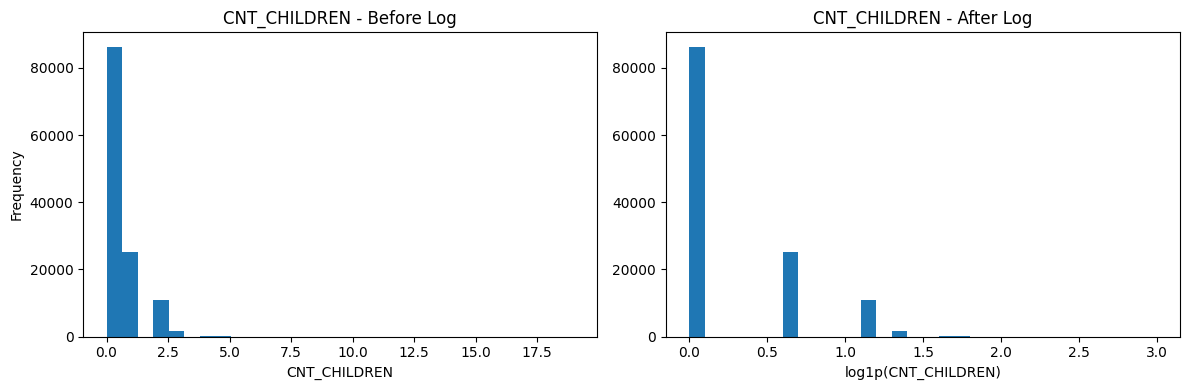

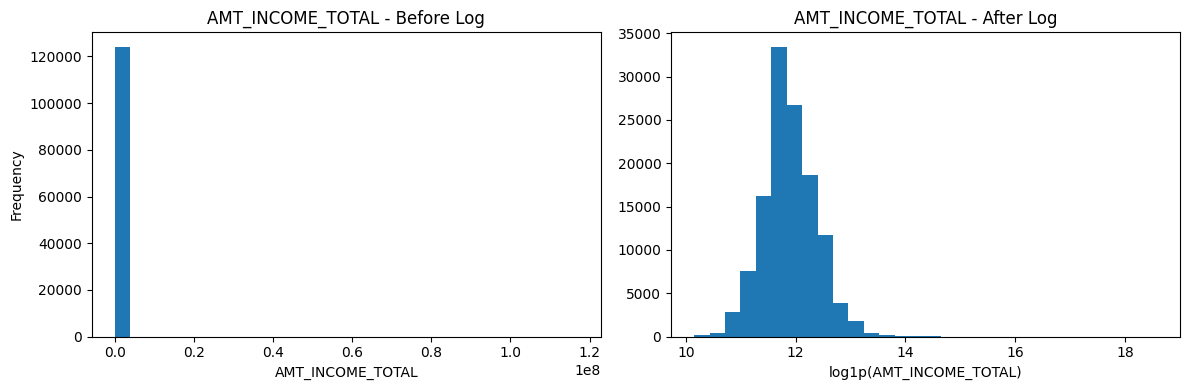

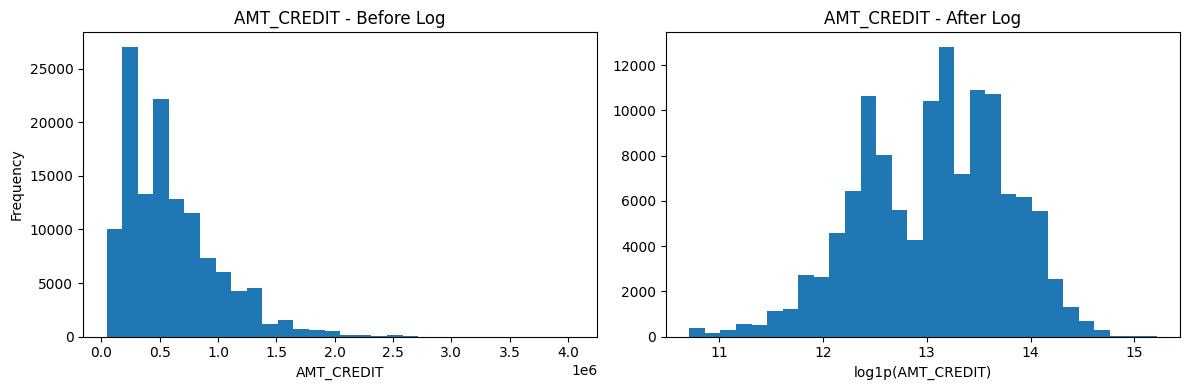

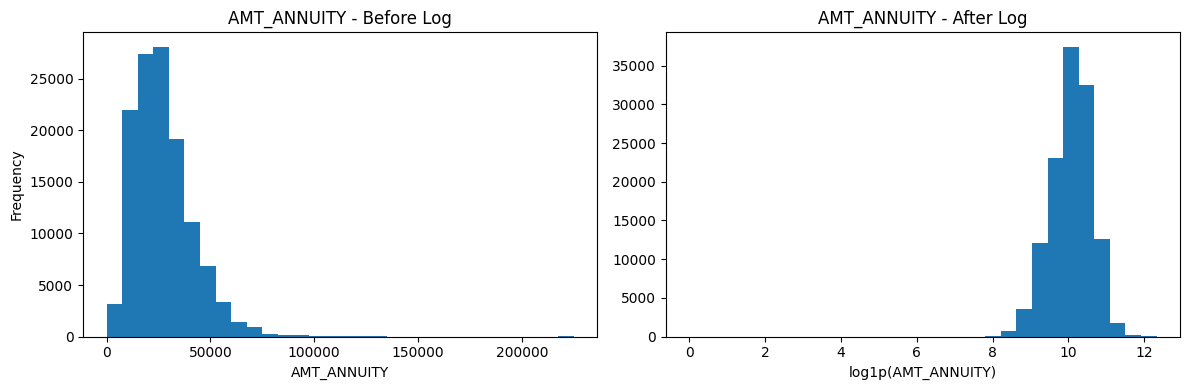

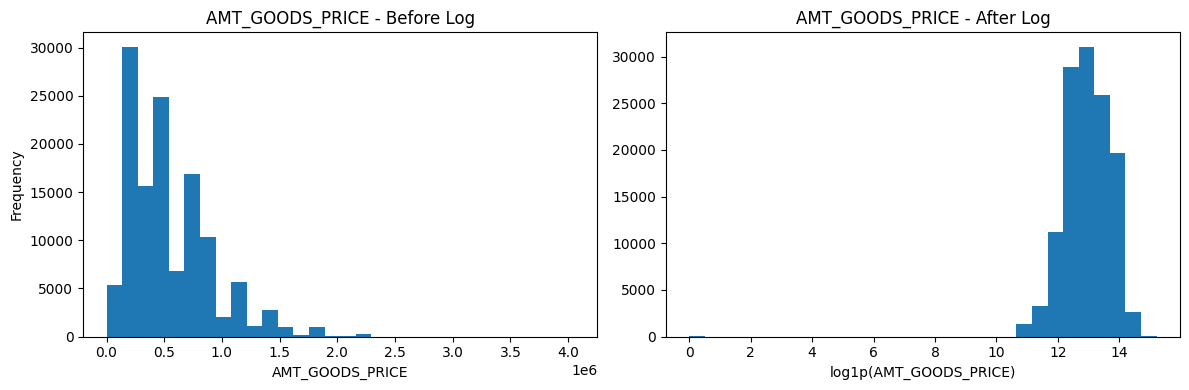

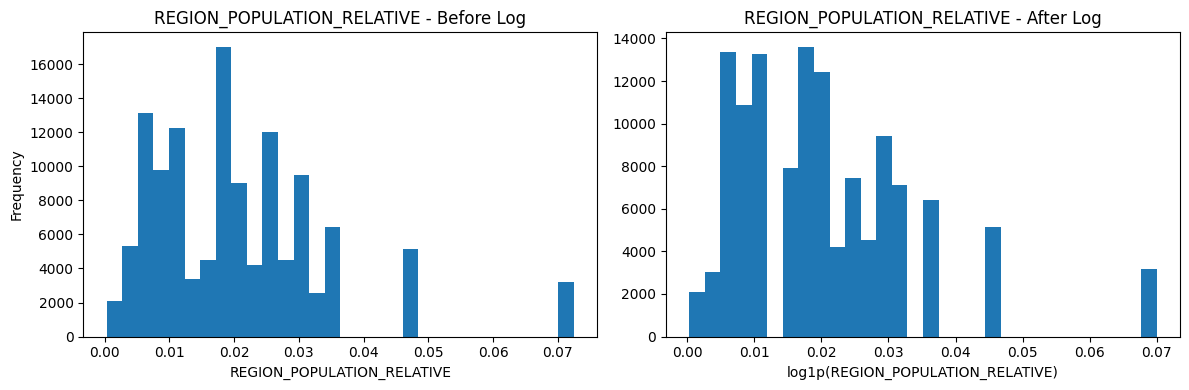

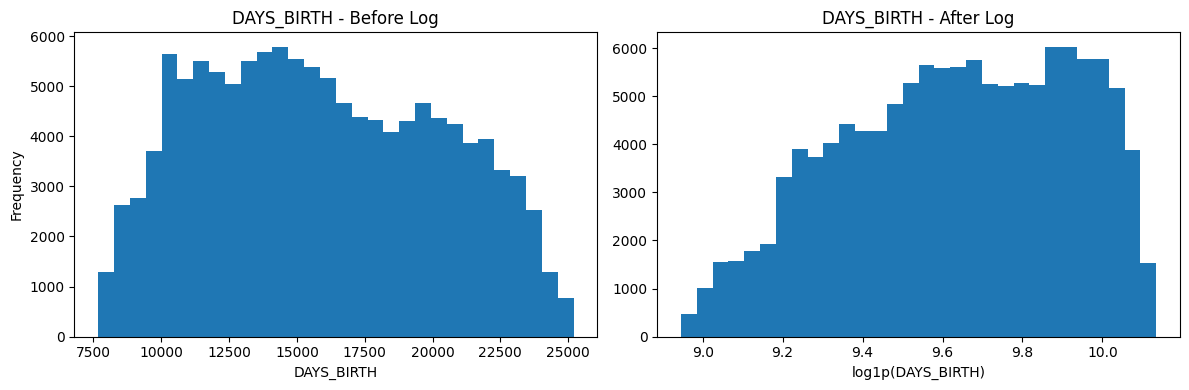

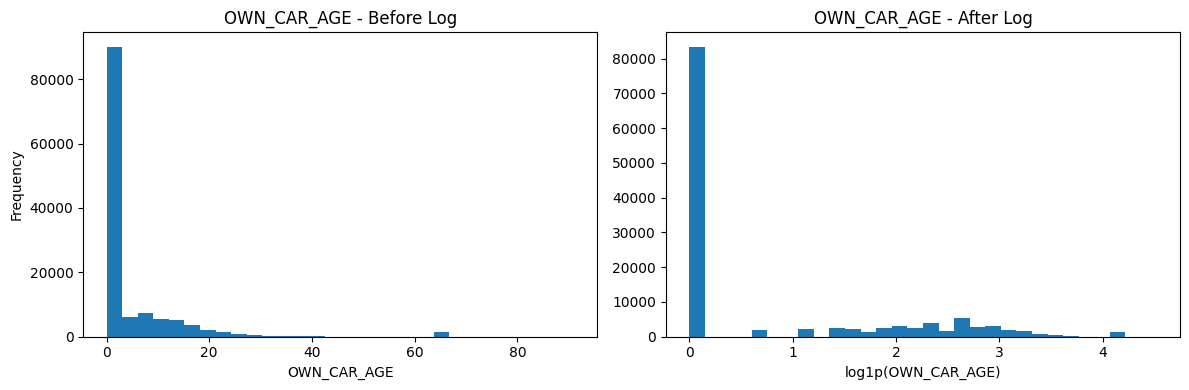

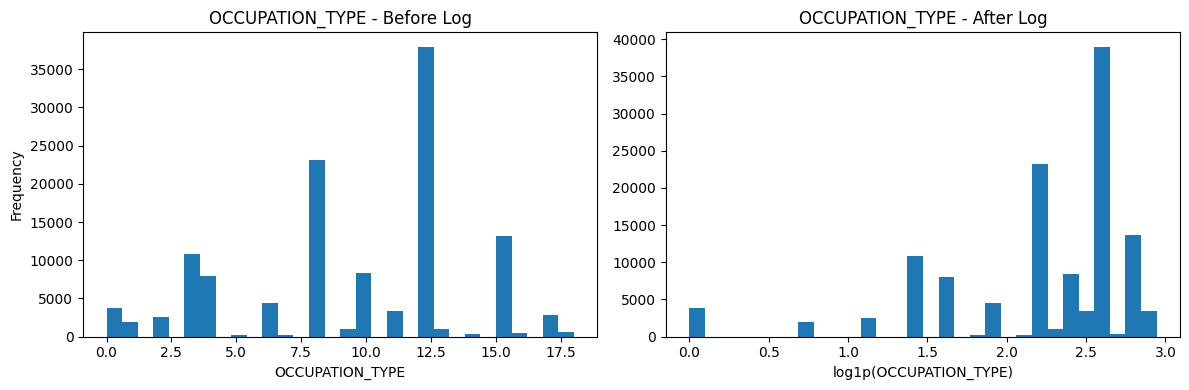

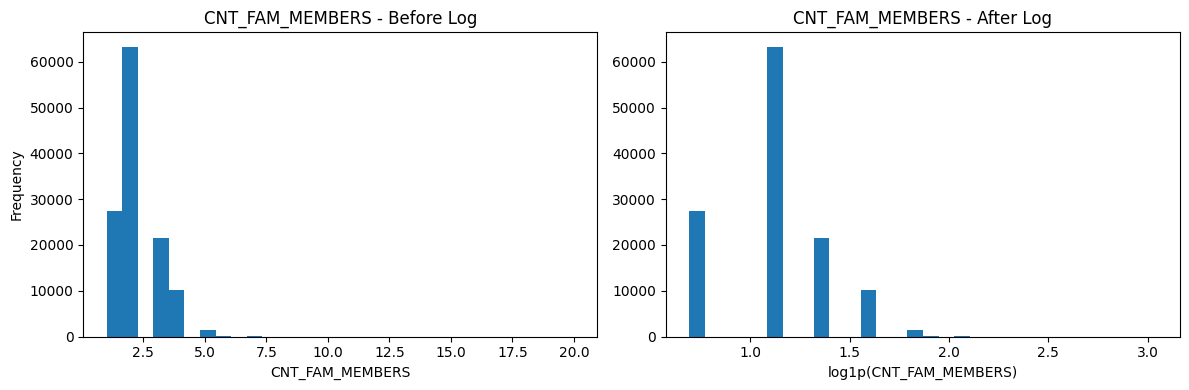

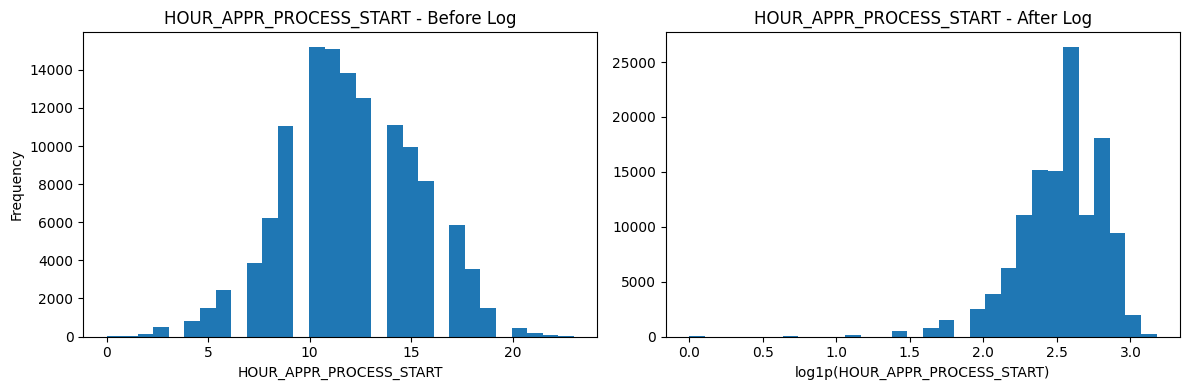

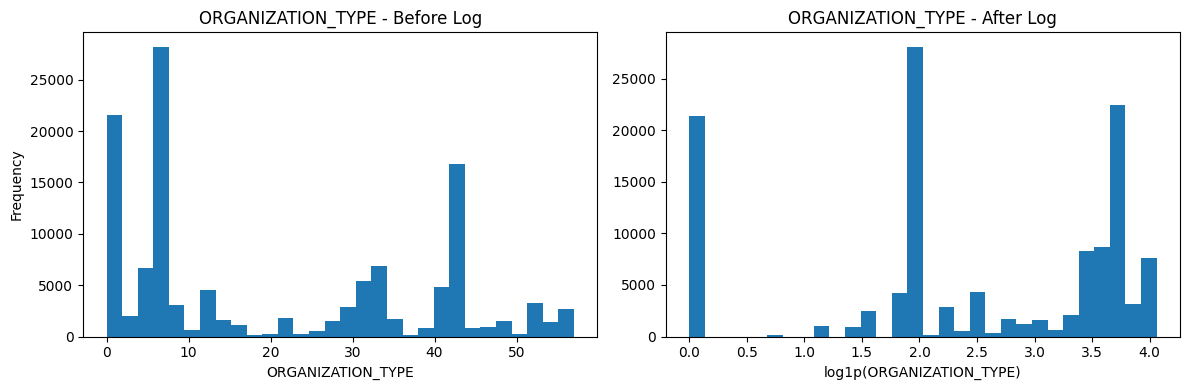

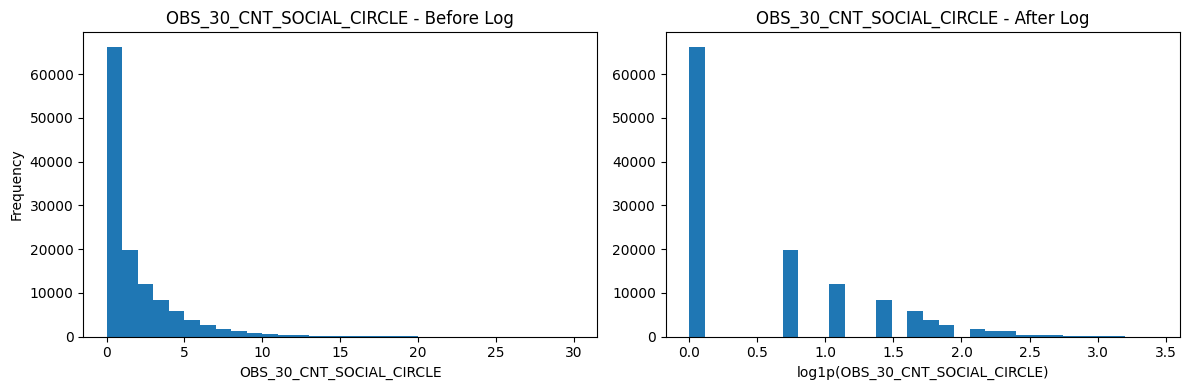

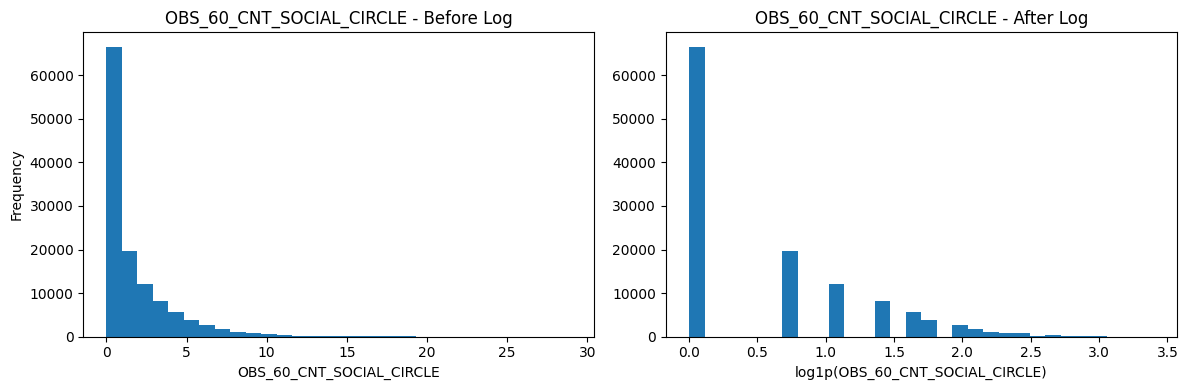

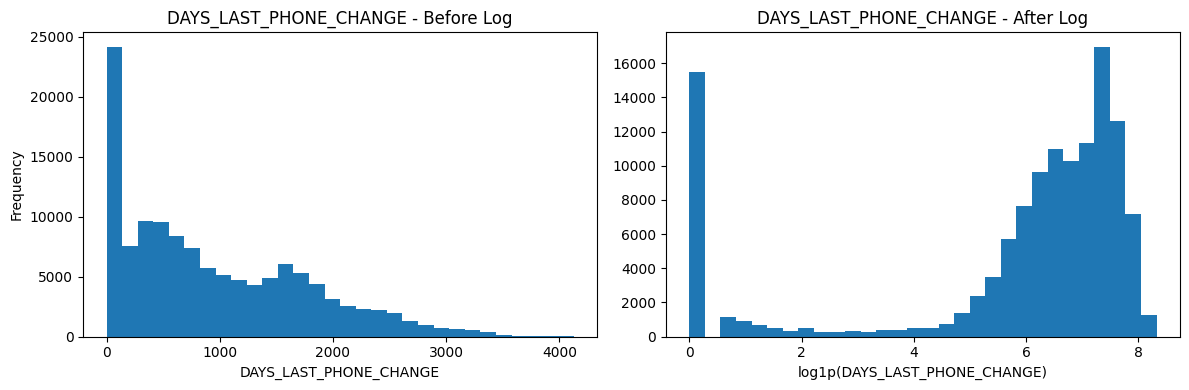

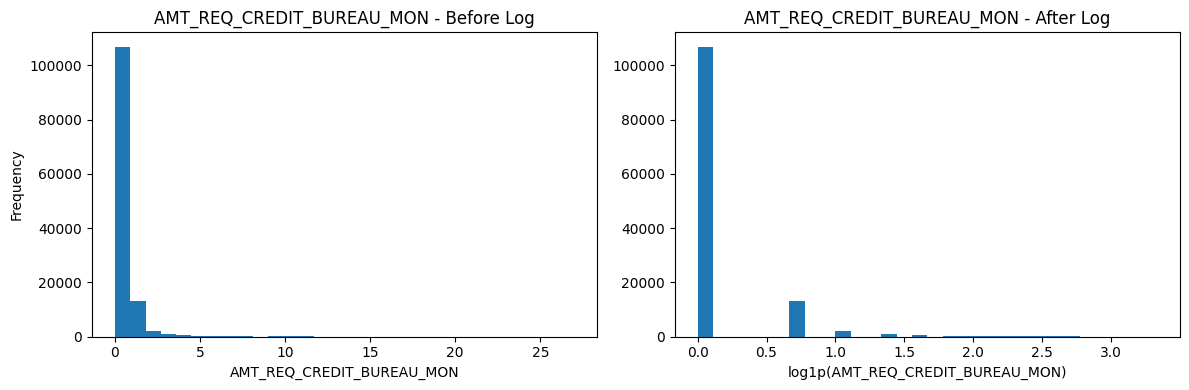

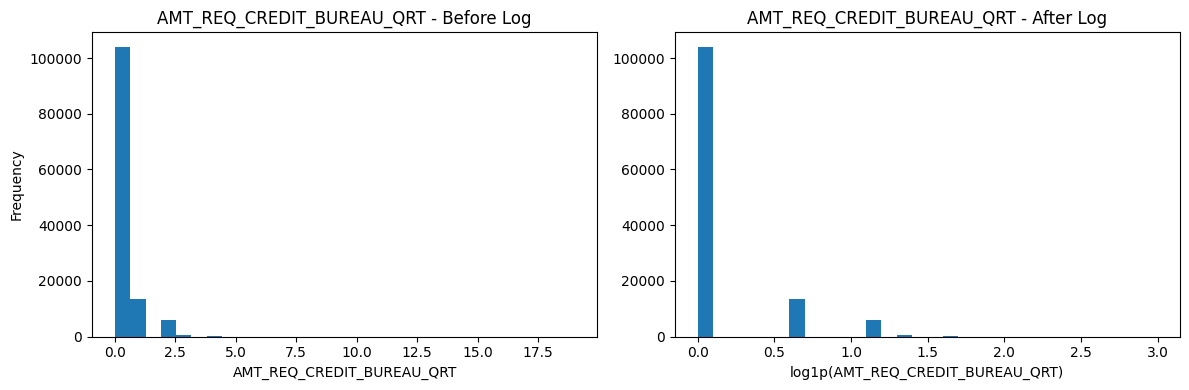

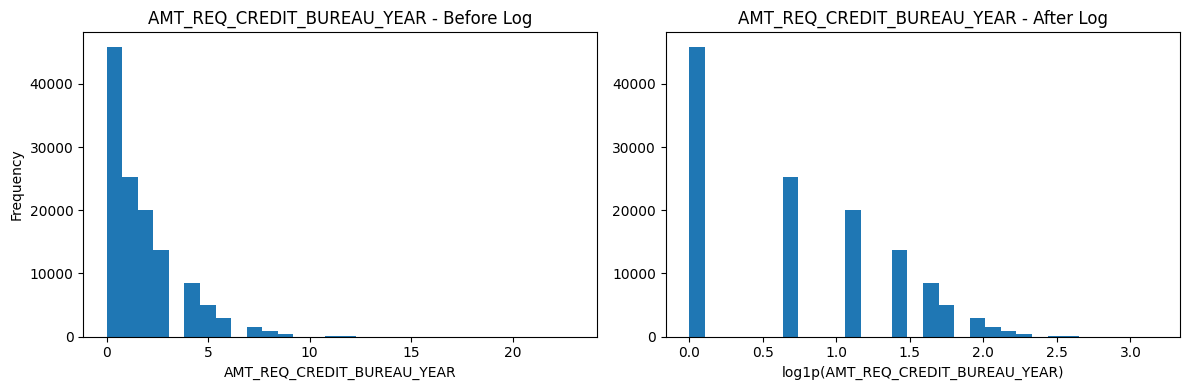

Log transformed features:
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [21]:
# Columns to skip
skip_cols = ("SK_ID_CURR", "TARGET")

# 1️⃣ Select numeric columns EXCEPT skipped ones
numeric_cols = [
    col for col in df.select_dtypes(include=['int64', 'float64']).columns
    if col not in skip_cols
]

# 2️⃣ Identify features eligible for log
log_features = [
    col for col in numeric_cols
    if df[col].nunique(dropna=True) >= 10
    and (df[col] >= 0).all()
]

# 3️⃣ Plot histograms before & after log (same image)
for col in log_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Before log
    axes[0].hist(df[col].dropna(), bins=30)
    axes[0].set_title(f"{col} - Before Log")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")

    # After log
    axes[1].hist(np.log1p(df[col].dropna()), bins=30)
    axes[1].set_title(f"{col} - After Log")
    axes[1].set_xlabel(f"log1p({col})")

    plt.tight_layout()
    plt.show()

# 4️⃣ Apply log transform AFTER visualization
df[log_features] = np.log1p(df[log_features])

print("Log transformed features:")
print(log_features)

# MinMaxScaler (0–1)

In [22]:
no_need_list = ["REGION_POPULATION_RELATIVE", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3",]

cols_to_scale = [col for col in numeric_cols if col not in no_need_list]

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [23]:
pd.DataFrame(df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_NEW,EXT_SOURCE_1_NEW,EXT_SOURCE_2_NEW,EXT_SOURCE_3_NEW
0,356466,1,0.0,0.0,0.0,1.0,0.000000,0.160296,0.601813,0.832621,...,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.5,0.5,1.0
1,414005,1,0.0,0.0,0.0,1.0,0.000000,0.165572,0.538864,0.810121,...,0.25,0.166667,0.0,0.000000,0.000000,0.436209,0.0,0.5,0.0,0.5
2,384021,0,0.0,0.0,0.0,0.0,0.231378,0.114839,0.402294,0.771743,...,0.00,0.000000,0.0,0.208015,0.231378,0.000000,0.0,1.0,0.5,0.5
3,345667,0,0.0,1.0,1.0,0.0,0.231378,0.231252,0.546593,0.835222,...,0.00,0.000000,0.0,0.000000,0.000000,0.218104,0.0,1.0,0.5,0.5
4,410170,0,0.0,0.0,0.0,0.0,0.000000,0.204768,0.511705,0.814913,...,0.00,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.5,0.0,0.0


In [24]:

# ---------------------------------------------------
# Create data type summary table
# ---------------------------------------------------
dtype_table = pd.DataFrame({
    "Feature": df.columns,
    "Data_Type": df.dtypes.astype(str)
}).reset_index(drop=True)

dtype_table


,Feature,Data_Type
0,SK_ID_CURR,int64
1,TARGET,int64
2,NAME_CONTRACT_TYPE,float64
3,CODE_GENDER,float64
4,FLAG_OWN_CAR,float64
5,FLAG_OWN_REALTY,float64
6,CNT_CHILDREN,float64
7,AMT_INCOME_TOTAL,float64
8,AMT_CREDIT,float64
9,AMT_ANNUITY,float64


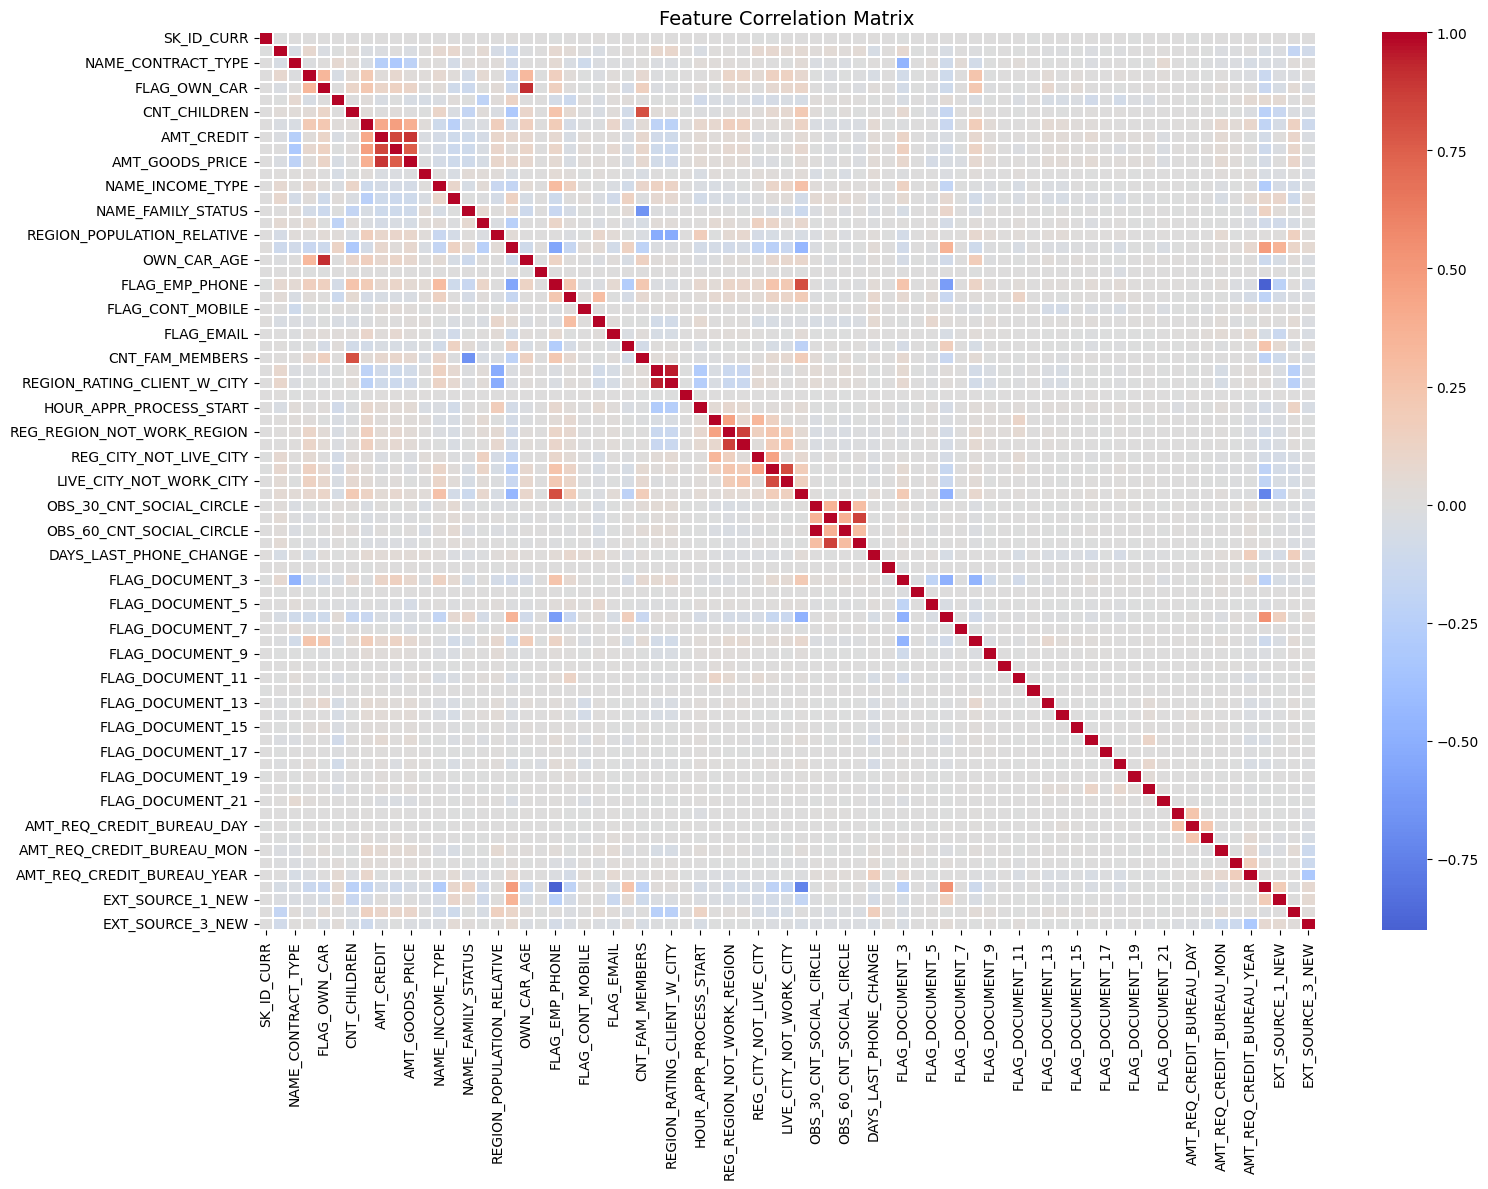

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------
# Keep numeric columns only
# ---------------------------------------------------

# ---------------------------------------------------
# Correlation matrix
# ---------------------------------------------------
corr_matrix = df.corr()

# ---------------------------------------------------
# Plot correlation heatmap
# ---------------------------------------------------
plt.figure(figsize=(16, 12))

sns.heatmap(
    corr_matrix,
    cmap="coolwarm",        # red = positive, blue = negative
    center=0,               # center color at 0
    linewidths=0.3,
    cbar=True
)

plt.title("Feature Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()


# Feature Selection "Forward"

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Step 1 — Separate features & target
X = df.drop(columns=["TARGET", "SK_ID_CURR"])
y = df["TARGET"]

# Step 2 — Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

best_features_per_model = {}

N_FEATURES = 15   # 👈 you control this

for model_name, model in models.items():
    print(f"\nRunning RFE for: {model_name}")

    rfe = RFE(
        estimator=model,
        n_features_to_select=N_FEATURES,
        step=1
    )

    # Fit RFE on TRAIN only
    rfe.fit(X_train, y_train)

    # Selected features
    selected_features = X_train.columns[rfe.support_].tolist()

    # Train final model
    model.fit(X_train[selected_features], y_train)
    y_pred = model.predict(X_test[selected_features])

    test_acc = accuracy_score(y_test, y_pred)

    best_features_per_model[model_name] = {
        "selected_features": selected_features,
        "n_features": len(selected_features),
        "test_accuracy": test_acc
    }

    print(f"Selected features: {len(selected_features)}")
    print(f"Test accuracy: {test_acc:.4f}")



Running RFE for: Decision Tree
Selected features: 15
Test accuracy: 0.6888

Running RFE for: AdaBoost
Selected features: 15
Test accuracy: 0.8034

Running RFE for: CatBoost


In [ ]:
best_features_per_model

# Machine Learning Models tuning, and testing

In [ ]:
def get_scores(model, X):
    """
    Returns probability scores for ROC-AUC
    """
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    elif hasattr(model, "decision_function"):
        return model.decision_function(X)
    else:
        return None



results = []

for name, model in models.items():
    print(f"\n================ {name} ================")

    # Step 1 — Separate features & target
    X = df.drop(columns=["TARGET", "SK_ID_CURR"])
    y = df["TARGET"]


    # Step 2 — First split (Train vs Temp)
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.10,
        random_state=42,
        stratify=y  # remove if regression
    )

    # Filter Features
    best_features = best_features_per_model[name]["selected_features"]
    X_train = X_train[best_features]
    X_test = X_test[best_features]

    # Fit
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # ROC-AUC
    y_score = get_scores(model, X_test)
    roc_auc = roc_auc_score(y_test, y_score) if y_score is not None else None

    # Store results
    results.append({
        "Model": name,
        "Accuracy": acc,
        "ROC_AUC": roc_auc,
        "TN": cm[0, 0],
        "FP": cm[0, 1],
        "FN": cm[1, 0],
        "TP": cm[1, 1],
    })

    # Print summary
    print(f"Accuracy : {acc:.4f}")
    print(f"ROC-AUC  : {roc_auc:.4f}" if roc_auc else "ROC-AUC  : N/A")
    print("Confusion Matrix:")
    print(cm)



results_df = pd.DataFrame(results)
results_df = results_df.sort_values(
    by=["ROC_AUC", "Accuracy"],
    ascending=False
)

results_df


In [ ]:
# =========================================================
# 3️⃣ ALL MODELS + PARAM GRIDS (ONE DICT)
# =========================================================
models_and_params = {




    "AdaBoost": (
        AdaBoostClassifier(),
        {
            "n_estimators": [100, 300],
            "learning_rate": [0.01, 0.1, 1.0],
            "algorithm": ["SAMME", "SAMME.R"],
        }
    ),



    "Decision Tree": (
        DecisionTreeClassifier(),
        {
            "max_depth": [None, 10, 20, 40],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 5],
            "max_features": ["sqrt", "log2", None],
            "class_weight": [None, "balanced"],
        }
    ),


    "CatBoost": (
        CatBoostClassifier(verbose=0),
        {
            "iterations": [300, 600],
            "learning_rate": [0.03, 0.1],
            "depth": [6, 8, 10],
            "l2_leaf_reg": [3, 5, 7],
        }
    ),
}


# =========================================================
# 4️⃣ RUN EVERYTHING (Before vs After)
# =========================================================
results = []

for name, (model, param_grid) in models_and_params.items():
    print(f"\n🚀 {name}")

    # Step 1 — Separate features & target
    X = df.drop(columns=["TARGET", "SK_ID_CURR"])
    y = df["TARGET"]


    # Step 2 — First split (Train vs Temp)
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.20,
        random_state=42,
        stratify=y  # remove if regression
    )

    # Filter Features
    best_features = best_features_per_model[name]["selected_features"]
    X_train = X_train[best_features]
    X_test = X_test[best_features]

    # ----- BEFORE -----
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc_before = accuracy_score(y_test, y_pred)
    roc_before = (
        roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        if hasattr(model, "predict_proba") else np.nan
    )

    # ----- GRID SEARCH -----
    gs = GridSearchCV(
        model,
        param_grid,
        scoring="roc_auc",
        cv=cv,
        n_jobs=-1,
        verbose=0
    )
    gs.fit(X_train, y_train)

    best_model = gs.best_estimator_
    y_pred_after = best_model.predict(X_test)

    acc_after = accuracy_score(y_test, y_pred_after)
    roc_after = (
        roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
        if hasattr(best_model, "predict_proba") else np.nan
    )

    results.append({
        "Model": name,
        "Accuracy Before": acc_before,
        "ROC-AUC Before": roc_before,
        "Accuracy After": acc_after,
        "ROC-AUC After": roc_after,
        "Best Params": gs.best_params_
    })

    print(results)


# =========================================================
# 5️⃣ FINAL ONE-SHEET RESULT
# =========================================================
results_df = pd.DataFrame(results).sort_values("ROC-AUC After", ascending=False)
results_df